In [ ]:
from pandas import read_csv

# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')

# summarize the first few rows
print(dataframe.head())

# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
    # count number of rows with missing values
    n_miss = dataframe[i].isnull().sum()
    perc = n_miss / dataframe.shape[0] * 100
    print('>%d, Missing: %d (%.1f%%)' % (i, n_miss, perc))


    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]
>0, Missing: 1 (0.3%)
>1, Missing: 0 (0.0%)
>2, Missing: 0 (0.0%)
>3, Missing: 60 (20.0%)
>4, Missing: 24 (8.0%)
>5, Missing: 58 (19.3%)
>6, Missing: 56 (18.7%)
>7, Missing: 69 (23.0%)
>8, Missing: 47 (15.7%)
>9, Missing: 32 (10.7%)
>10, Missing: 55 

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# print total missing values before imputation
print('Missing: %d' % sum(isnan(X).flatten()))

# define imputer
imputer = KNNImputer()

# fir on the dataset
imputer.fit(X)

# fit and transform the dataset
Xtrans = imputer.transform(X)

# print total missing values after imputation
print('Missing: %d' % sum(isnan(Xtrans).flatten()))


Missing: 1605
Missing: 0


chúng tôi có thể đánh giá tập dữ liệu được quy định và đường dẫn mô hình rừng ngẫu nhiên cho tập dữ liệu đau bụng ở ngựa với xác thực chéo 10 lần lặp lại

In [ ]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')

# split into input and output elements
data =dataframe.values
ix = [i for i in range(data.shape[1]) if i!= 23]
X, y = data[:, ix], data[:, 23]

# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.859 (0.058)


**KNNImputer và số lượng hàng xóm khác nhau**
Siêu tham số chính cho thuật toán KNN là k; kiểm soát số lượng hàng xóm gần nhất được sử dụng để đóng góp vào dự đoán
Cách tốt nhất là kiểm tra một bố giá trị khác nhau của k

Vd: bên dưới đánh giá các đường dẫn mô hình và so sánh các giá trị lẻ của k từ 1 đến 21

>1: 0.862 (0.052)
>3: 0.862 (0.049)
>5: 0.862 (0.053)
>7: 0.863 (0.057)
>9: 0.868 (0.057)
>15: 0.861 (0.056)
>18: 0.854 (0.057)
>21: 0.861 (0.058)


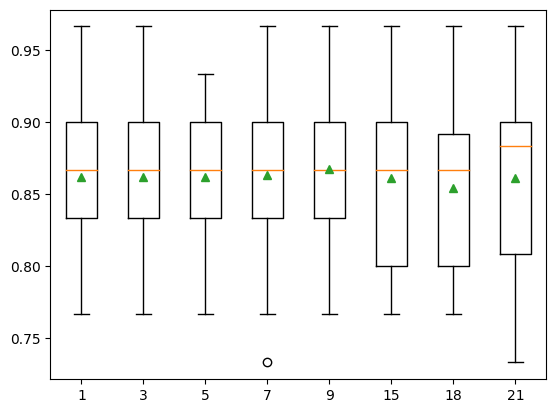

In [ ]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset
results = []
strategies = [str(i) for i in [1, 3, 5, 7, 9, 15, 18, 21]]
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[
        ('i', KNNImputer(n_neighbors=int(s))),
        ('m', RandomForestClassifier())
    ])

    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

    # store results
    results.append(scores)
    print('>%s: %.3f (%.3f)' % (s, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

**Biến đổi KNNImputer khi đưa ra dự đoán**

In [ ]:
from numpy import mean
from numpy import nan
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# create the modeling pipeline
pipeline = Pipeline(steps=[
        ('i', KNNImputer(n_neighbors=int(s))),
        ('m', RandomForestClassifier())
    ])

# fit the model
pipeline.fit(X, y)

# define new data
row = [2,1,5301010,38.50,66,28,3,3,nan,2,5,4,4,nan,nan,nan,
       3,5,45.00,8.40,nan,nan,2,11300,00000,00000,2]

# make a prediction
yhat = pipeline.predict([row])

#summarize prediction
print('Predicted Class: %d' % yhat[0])


Predicted Class: 2
